In [4]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram

In [87]:
# Quantum XOR - really just CNOT
# input qubits: a, b
# output qubit: b
def qxor(circ, a, b) :
    circ.cx(a, b)

In [88]:
# Create registers and circuit
n = 13
a = QuantumRegister(n, 'a')  # input
qc = QuantumCircuit(a)

In [89]:
# All combinations of input
qc.h(a)
qc.barrier()
# Build XOR circuit

if n > 3:
    for i in range(n):
        if i%2 == 0:
            if i == n-1:
                qxor(qc, a[i-1], a[i])
                qxor(qc, a[i-3], a[i])
            else:
                qxor(qc, a[i], a[i+1])
        else:
            if i > 2:
                if i < n-2:
                    qxor(qc, a[i-2], a[i])
else:
    for i in range(n-1):
        qxor(qc, a[i], a[i+1])
                    

qc.barrier()
# Measure the output
m = ClassicalRegister(1, 'output')
qc.add_register(m)
qc.measure(a[n-1],m)

In [90]:
# Simulate and show results
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=4096)  # shots default = 1024
result = job.result()
print(result.get_counts())

{'0': 2094, '1': 2002}


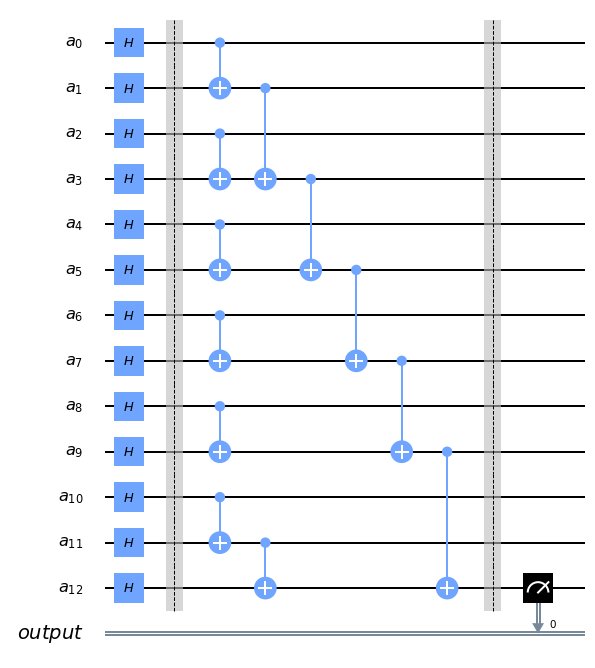

In [91]:
qc.draw(output='mpl')

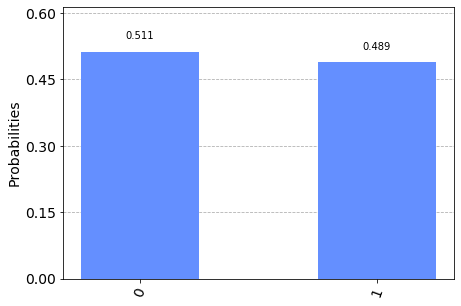

In [92]:
plot_histogram(result.get_counts())